# Feature Engineering

---

1. Import packages
2. Load data
3. Feature engineering

---

## 1. Import packages

In [230]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

---
## 2. Load data

In [231]:
df = pd.read_csv('./clean_data_after_eda.csv')
df["date_activ"] = pd.to_datetime(df["date_activ"], format='%Y-%m-%d')
df["date_end"] = pd.to_datetime(df["date_end"], format='%Y-%m-%d')
df["date_modif_prod"] = pd.to_datetime(df["date_modif_prod"], format='%Y-%m-%d')
df["date_renewal"] = pd.to_datetime(df["date_renewal"], format='%Y-%m-%d')

In [232]:
df.head(3)

,Unnamed: 0,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,...,mean_3m_price_off_peak_var,mean_3m_price_peak_var,mean_3m_price_mid_peak_var,mean_3m_price_off_peak_fix,mean_3m_price_peak_fix,mean_3m_price_mid_peak_fix,mean_3m_price_off_peak,mean_3m_price_peak,mean_3m_price_mid_peak,churn
0,0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,...,0.131756,0.092638,0.036909,42.497907,12.218665,8.145777,42.629663,12.311304,8.182687,1
1,1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,...,0.147600,0.000000,0.000000,44.444710,0.000000,0.000000,44.592310,0.000000,0.000000,0
2,2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,...,0.167798,0.088409,0.000000,44.444710,0.000000,0.000000,44.612508,0.088409,0.000000,0


In [233]:
df.shape

(14605, 54)

In [234]:
df = df.drop('Unnamed: 0', axis = 1)

In [235]:
df.shape

(14605, 53)

In the above dataset post EDA and merging the client and the price tables Our dependent variable is Churn which is a binary variable. We will build a classification model to predict whether a customer has churned or not based on the dependent variables provided.

In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14605 entries, 0 to 14604
Data columns (total 53 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              14605 non-null  object        
 1   channel_sales                   14605 non-null  object        
 2   cons_12m                        14605 non-null  int64         
 3   cons_gas_12m                    14605 non-null  int64         
 4   cons_last_month                 14605 non-null  int64         
 5   date_activ                      14605 non-null  datetime64[ns]
 6   date_end                        14605 non-null  datetime64[ns]
 7   date_modif_prod                 14605 non-null  datetime64[ns]
 8   date_renewal                    14605 non-null  datetime64[ns]
 9   forecast_cons_12m               14605 non-null  float64       
 10  forecast_cons_year              14605 non-null  int64         
 11  fo

In [237]:
df1 = df.copy()

---

## 3. Feature engineering

### Difference between off-peak prices in December and preceding January

Below is the code created by your colleague to calculate the feature described above. Use this code to re-create this feature and then think about ways to build on this feature to create features with a higher predictive power.

In [238]:
price_df = pd.read_csv('price_data.csv')
price_df["price_date"] = pd.to_datetime(price_df["price_date"], format='%Y-%m-%d')
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [239]:
price_df.shape

(193002, 8)

In [240]:
# Group off-peak prices by companies and month
monthly_price_by_id_off_peak = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()

# Get january and december prices
jan_prices_off_peak = monthly_price_by_id_off_peak.groupby('id').first().reset_index()
dec_prices_off_peak = monthly_price_by_id_off_peak.groupby('id').last().reset_index()

# Calculate the difference
diff_off_peak = pd.merge(dec_prices_off_peak.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), jan_prices_off_peak.drop(columns='price_date'), on='id')
diff_off_peak['offpeak_diff_dec_january_energy'] = diff_off_peak['dec_1'] - diff_off_peak['price_off_peak_var']
diff_off_peak['offpeak_diff_dec_january_power'] = diff_off_peak['dec_2'] - diff_off_peak['price_off_peak_fix']
diff_off_peak = diff_off_peak[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]
diff_off_peak.head()

,id,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,0002203ffbb812588b632b9e628cc38d,-0.006192,0.162916
1,0004351ebdd665e6ee664792efc4fd13,-0.004104,0.177779
2,0010bcc39e42b3c2131ed2ce55246e3c,0.050443,1.500000
3,0010ee3855fdea87602a5b7aba8e42de,-0.010018,0.162916
4,00114d74e963e47177db89bc70108537,-0.003994,-0.000001


In [241]:
diff_off_peak.shape

(16096, 3)

In [242]:
# Group peak prices by companies and month
monthly_price_by_id_peak = price_df.groupby(['id', 'price_date']).agg({'price_peak_var': 'mean', 'price_peak_fix': 'mean'}).reset_index()

# Get january and december prices
jan_prices_peak = monthly_price_by_id_peak.groupby('id').first().reset_index()
dec_prices_peak = monthly_price_by_id_peak.groupby('id').last().reset_index()

# Calculate the difference
diff_peak = pd.merge(dec_prices_peak.rename(columns={'price_peak_var': 'dec_1', 'price_peak_fix': 'dec_2'}), jan_prices_peak.drop(columns='price_date'), on='id')
diff_peak['peak_diff_dec_january_energy'] = diff_peak['dec_1'] - diff_peak['price_peak_var']
diff_peak['peak_diff_dec_january_power'] = diff_peak['dec_2'] - diff_peak['price_peak_fix']
diff_peak = diff_peak[['id', 'peak_diff_dec_january_energy','peak_diff_dec_january_power']]
diff_peak.head()

,id,peak_diff_dec_january_energy,peak_diff_dec_january_power
0,0002203ffbb812588b632b9e628cc38d,-0.002302,0.097749
1,0004351ebdd665e6ee664792efc4fd13,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,-0.005120,0.097749
4,00114d74e963e47177db89bc70108537,0.000000,0.000000


In [243]:
diff_peak.shape

(16096, 3)

In [244]:
# Group mid peak prices by companies and month
monthly_price_by_id_midpeak = price_df.groupby(['id', 'price_date']).agg({'price_mid_peak_var': 'mean', 'price_mid_peak_fix': 'mean'}).reset_index()

# Get january and december prices
jan_prices_mid_peak = monthly_price_by_id_midpeak.groupby('id').first().reset_index()
dec_prices_mid_peak = monthly_price_by_id_midpeak.groupby('id').last().reset_index()

# Calculate the difference
diff_mid_peak = pd.merge(dec_prices_mid_peak.rename(columns={'price_mid_peak_var': 'dec_1', 'price_mid_peak_fix': 'dec_2'}), jan_prices_mid_peak.drop(columns='price_date'), on='id')
diff_mid_peak['mid_peak_diff_dec_january_energy'] = diff_mid_peak['dec_1'] - diff_mid_peak['price_mid_peak_var']
diff_mid_peak['mid_peak_diff_dec_january_power'] = diff_mid_peak['dec_2'] - diff_mid_peak['price_mid_peak_fix']
diff_mid_peak = diff_mid_peak[['id', 'mid_peak_diff_dec_january_energy','mid_peak_diff_dec_january_power']]
diff_mid_peak.head()

,id,mid_peak_diff_dec_january_energy,mid_peak_diff_dec_january_power
0,0002203ffbb812588b632b9e628cc38d,0.003487,0.065166
1,0004351ebdd665e6ee664792efc4fd13,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.000763,0.065166
4,00114d74e963e47177db89bc70108537,0.000000,0.000000


In [245]:
diff_mid_peak.shape

(16096, 3)

In [246]:
# Merging the diff calculated with the df

In [247]:
df = df.merge(diff_off_peak, on = 'id')
df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,mean_3m_price_mid_peak_var,mean_3m_price_off_peak_fix,mean_3m_price_peak_fix,mean_3m_price_mid_peak_fix,mean_3m_price_off_peak,mean_3m_price_peak,mean_3m_price_mid_peak,churn,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.036909,42.497907,12.218665,8.145777,42.629663,12.311304,8.182687,1,0.020057,3.700961
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000000,44.444710,0.000000,0.000000,44.592310,0.000000,0.000000,0,-0.003767,0.177779
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000000,44.444710,0.000000,0.000000,44.612508,0.088409,0.000000,0,-0.004670,0.177779
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.000000,44.444710,0.000000,0.000000,44.593296,0.000000,0.000000,0,-0.004547,0.177779
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0.073719,40.728885,24.437330,16.291555,40.848791,24.539003,16.365274,0,-0.006192,0.162916


In [248]:
df = df.merge(diff_peak, on = 'id')
df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,mean_3m_price_peak_fix,mean_3m_price_mid_peak_fix,mean_3m_price_off_peak,mean_3m_price_peak,mean_3m_price_mid_peak,churn,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power,peak_diff_dec_january_energy,peak_diff_dec_january_power
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,12.218665,8.145777,42.629663,12.311304,8.182687,1,0.020057,3.700961,-0.017912,-24.339581
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000000,0.000000,44.592310,0.000000,0.000000,0,-0.003767,0.177779,0.000000,0.000000
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000000,0.000000,44.612508,0.088409,0.000000,0,-0.004670,0.177779,0.000528,0.000000
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.000000,0.000000,44.593296,0.000000,0.000000,0,-0.004547,0.177779,0.000000,0.000000
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,24.437330,16.291555,40.848791,24.539003,16.365274,0,-0.006192,0.162916,-0.002302,0.097749


In [249]:
df = df.merge(diff_mid_peak, on = 'id')
df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,mean_3m_price_off_peak,mean_3m_price_peak,mean_3m_price_mid_peak,churn,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power,peak_diff_dec_january_energy,peak_diff_dec_january_power,mid_peak_diff_dec_january_energy,mid_peak_diff_dec_january_power
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,42.629663,12.311304,8.182687,1,0.020057,3.700961,-0.017912,-24.339581,-0.071536,-16.226389
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,44.592310,0.000000,0.000000,0,-0.003767,0.177779,0.000000,0.000000,0.000000,0.000000
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,44.612508,0.088409,0.000000,0,-0.004670,0.177779,0.000528,0.000000,0.000000,0.000000
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,44.593296,0.000000,0.000000,0,-0.004547,0.177779,0.000000,0.000000,0.000000,0.000000
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,40.848791,24.539003,16.365274,0,-0.006192,0.162916,-0.002302,0.097749,0.003487,0.065166


In [250]:
df.shape

(14605, 59)

In [251]:
# Dropping the datetime variables 'date_activ','date_end','date_modif_prod','date_renewal' and 'id' as we no longer need them for analysis.

In [252]:
df = df.drop(['date_activ','date_end','date_modif_prod','date_renewal','id'], axis = 1)

In [253]:
df.columns

Index(['channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max',
       'mean_year_price_off_peak_var', 'mean_year_price_peak_var',
       'mean_year_price_mid_peak_var', 'mean_year_price_off_peak_fix',
       'mean_year_price_peak_fix', 'mean_year_price_mid_peak_fix',
       'mean_year_price_off_peak', 'mean_year_price_peak',
       'mean_year_price_mid_peak', 'mean_6m_price_off_peak_var',
       'mean_6m_price_peak_var', 'mean_6m_price_mid_peak_var',
       'mean_6m_price_off_peak_fix', 'mean_6m_price_peak_fix',
       'mean_6m_price_mid_peak_fix', 'mean_6m_price_off_peak',
       'mean_6m_price_peak', 'mean_6m_pric

In [254]:
# Dropping mean_year_price_off_peak_var','mean_year_price_peak_var','mean_year_price_mid_peak_var','mean_year_price_off_peak_fix','mean_year_price_peak_fix','mean_year_price_mid_peak_fix' as  they add up to 'mean_year_price_off_peak', 'mean_year_price_peak' and'mean_year_price_mid_peak'

In [255]:
df = df.drop(['mean_year_price_off_peak_var','mean_year_price_peak_var','mean_year_price_mid_peak_var',
              'mean_year_price_off_peak_fix','mean_year_price_peak_fix','mean_year_price_mid_peak_fix'], axis = 1)

In [256]:
# Dropping 'mean_6m_price_off_peak_var', 'mean_6m_price_peak_var','mean_6m_price_mid_peak_var', 'mean_6m_price_off_peak_fix','mean_6m_price_peak_fix', 'mean_6m_price_mid_peak_fix' as they add up to 'mean_6m_price_off_peak', 'mean_6m_price_peak','mean_6m_price_mid_peak'

In [257]:
df = df.drop(['mean_6m_price_off_peak_var', 'mean_6m_price_peak_var','mean_6m_price_mid_peak_var', 
         'mean_6m_price_off_peak_fix','mean_6m_price_peak_fix', 'mean_6m_price_mid_peak_fix'], axis = 1)

In [258]:
# Dropping 'mean_3m_price_off_peak_var','mean_3m_price_peak_var', 'mean_3m_price_mid_peak_var','mean_3m_price_off_peak_fix', 'mean_3m_price_peak_fix','mean_3m_price_mid_peak_fix', as they add upto 'mean_3m_price_off_peak','mean_3m_price_peak', 'mean_3m_price_mid_peak',

In [259]:
df = df.drop(['mean_3m_price_off_peak_var','mean_3m_price_peak_var', 'mean_3m_price_mid_peak_var',
         'mean_3m_price_off_peak_fix', 'mean_3m_price_peak_fix','mean_3m_price_mid_peak_fix'], axis = 1)

In [260]:
df.head()

,channel_sales,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,...,mean_3m_price_off_peak,mean_3m_price_peak,mean_3m_price_mid_peak,churn,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power,peak_diff_dec_january_energy,peak_diff_dec_january_power,mid_peak_diff_dec_january_energy,mid_peak_diff_dec_january_power
0,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,...,42.629663,12.311304,8.182687,1,0.020057,3.700961,-0.017912,-24.339581,-0.071536,-16.226389
1,MISSING,4660,0,0,189.95,0,0.0,16.27,0.145711,0.000000,...,44.592310,0.000000,0.000000,0,-0.003767,0.177779,0.000000,0.000000,0.000000,0.000000
2,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,47.96,0,0.0,38.72,0.165794,0.087899,...,44.612508,0.088409,0.000000,0,-0.004670,0.177779,0.000528,0.000000,0.000000,0.000000
3,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,240.04,0,0.0,19.83,0.146694,0.000000,...,44.593296,0.000000,0.000000,0,-0.004547,0.177779,0.000000,0.000000,0.000000,0.000000
4,MISSING,4425,0,526,445.75,526,0.0,131.73,0.116900,0.100015,...,40.848791,24.539003,16.365274,0,-0.006192,0.162916,-0.002302,0.097749,0.003487,0.065166


# 4. Encoding Cateorical variables

In [261]:
# We have 3 variables which are categories 'channel_sales', 'has_gas' and 'origin_up'. Applying One Hot Encoding and removing the n+1 dummy variables

In [262]:
df = pd.get_dummies(df,columns = ['channel_sales', 'has_gas' ,'origin_up'],drop_first = True)

In [263]:
df.head()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,channel_sales_foosdfpfkusacimwkcsosbicdxkicaua,channel_sales_lmkebamcaaclubfxadlmueccxoimlema,channel_sales_sddiedcslfslkckwlfkdpoeeailfpeds,channel_sales_usilxuppasemubllopkaafesmlibmsdf,has_gas_t,origin_up_ewxeelcelemmiwuafmddpobolfuxioce,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw,origin_up_usapbepcfoloekilkwsdiboslwaxobdp
0,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,...,1,0,0,0,1,0,0,0,1,0
1,4660,0,0,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,...,0,0,0,0,0,0,1,0,0,0
2,544,0,0,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,...,1,0,0,0,0,0,1,0,0,0
3,1584,0,0,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,...,0,1,0,0,0,0,1,0,0,0
4,4425,0,526,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,...,0,0,0,0,0,0,1,0,0,0


In [264]:
df.rename(columns = {'has_gas_t': 'has_gas'}, inplace = True)

# 5. Transformation of Numerical Columns

In [265]:
# From the EDA we had seen that some of the numerical variables are right skewed. We can apply a log transformation to transform these variables.

In [266]:
df.columns

Index(['cons_12m', 'cons_gas_12m', 'cons_last_month', 'forecast_cons_12m',
       'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'imp_cons',
       'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'pow_max', 'mean_year_price_off_peak',
       'mean_year_price_peak', 'mean_year_price_mid_peak',
       'mean_6m_price_off_peak', 'mean_6m_price_peak',
       'mean_6m_price_mid_peak', 'mean_3m_price_off_peak',
       'mean_3m_price_peak', 'mean_3m_price_mid_peak', 'churn',
       'offpeak_diff_dec_january_energy', 'offpeak_diff_dec_january_power',
       'peak_diff_dec_january_energy', 'peak_diff_dec_january_power',
       'mid_peak_diff_dec_january_energy', 'mid_peak_diff_dec_january_power',
       'channel_sales_epumfxlbckeskwekxbiuasklxalciiuu',
       'channel_sales_ewpakwlliwisiwduibdlfmalxowmwpci'

In [267]:
numerical_cols = df[['cons_12m', 'cons_gas_12m', 'cons_last_month', 'forecast_cons_12m',
       'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'imp_cons',
       'margin_gross_pow_ele', 'margin_net_pow_ele', 
       'net_margin',  'pow_max'
       ]]

In [268]:
numerical_cols.describe().T

,count,mean,std,min,25%,50%,75%,max
cons_12m,14605.0,159230.267032,573483.629064,0.0,5674.000000,14116.000000,40764.000000,6.207104e+06
cons_gas_12m,14605.0,28091.082506,162978.563803,0.0,0.000000,0.000000,0.000000,4.154590e+06
cons_last_month,14605.0,16091.371448,64366.262314,0.0,0.000000,793.000000,3383.000000,7.712030e+05
forecast_cons_12m,14605.0,1868.638618,2387.651549,0.0,494.980000,1112.610000,2402.270000,8.290283e+04
forecast_cons_year,14605.0,1399.858747,3247.876793,0.0,0.000000,314.000000,1746.000000,1.753750e+05
forecast_discount_energy,14605.0,0.966450,5.108355,0.0,0.000000,0.000000,0.000000,3.000000e+01
forecast_meter_rent_12m,14605.0,63.090448,66.166636,0.0,16.180000,18.800000,131.030000,5.993100e+02
forecast_price_energy_off_peak,14605.0,0.137282,0.024623,0.0,0.116340,0.143166,0.146348,2.739630e-01
forecast_price_energy_peak,14605.0,0.050488,0.049037,0.0,0.000000,0.084138,0.098837,1.959750e-01
forecast_price_pow_off_peak,14605.0,43.130085,4.486140,0.0,40.606701,44.311378,44.311378,5.926638e+01


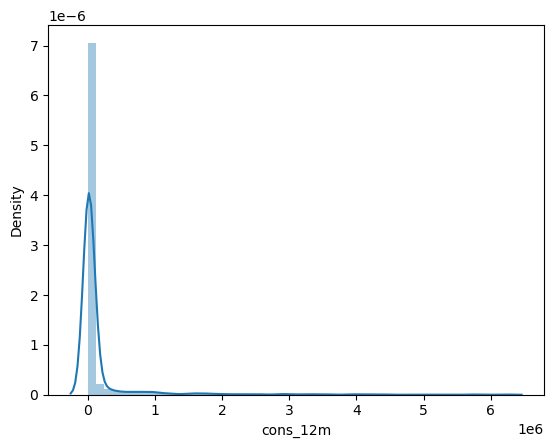

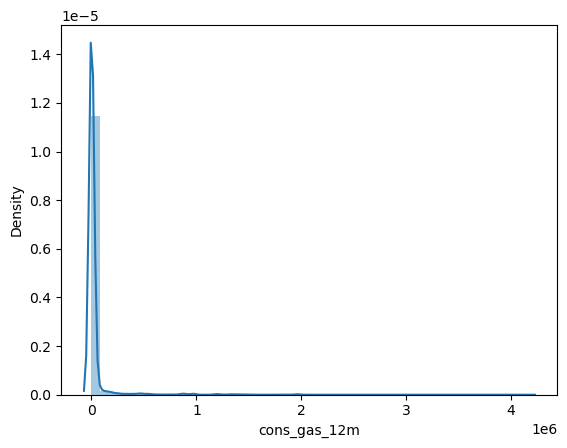

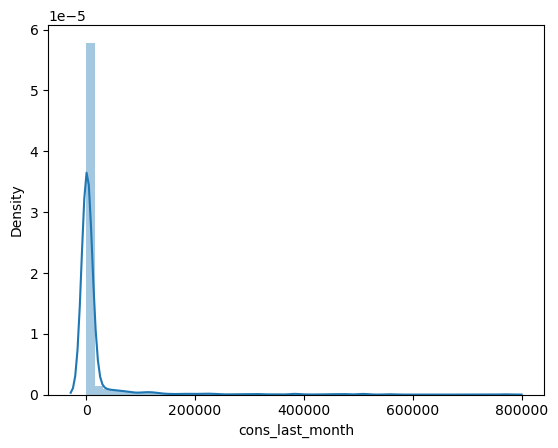

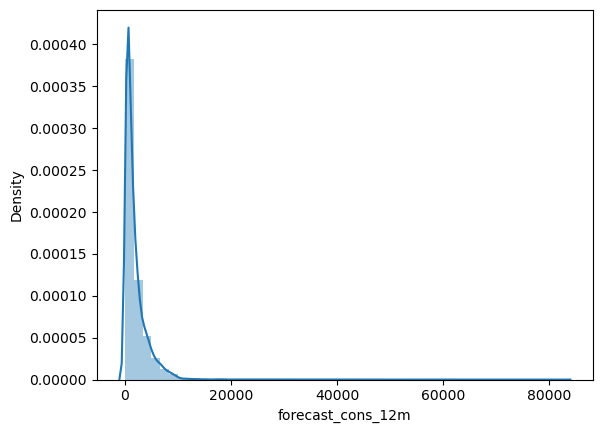

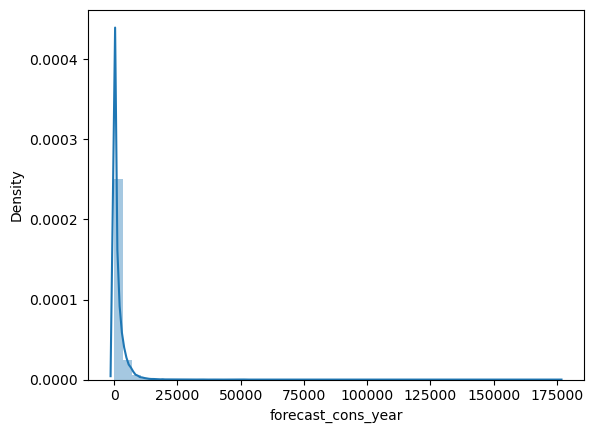

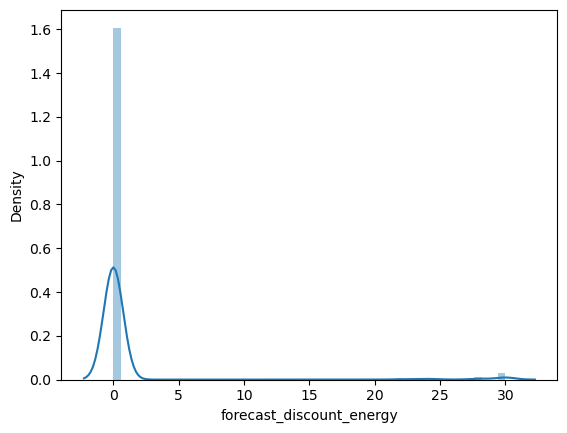

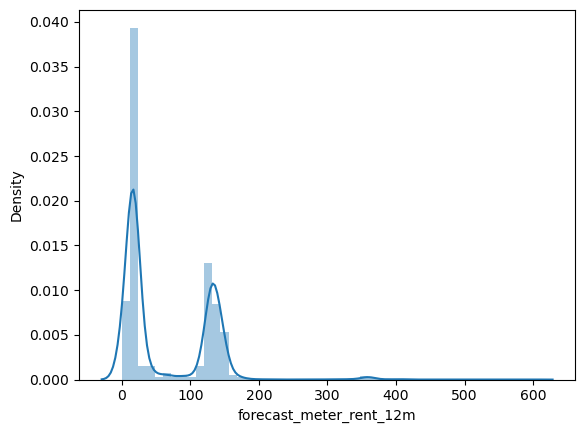

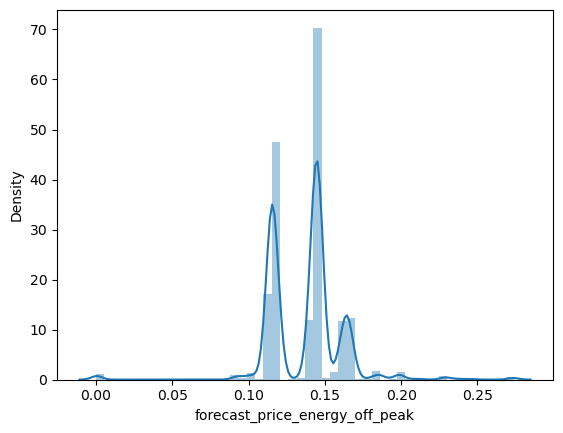

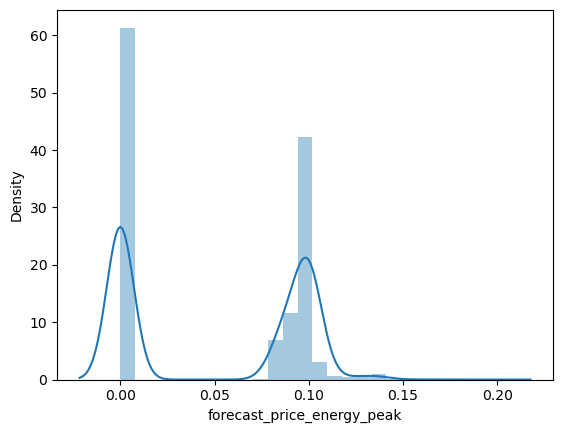

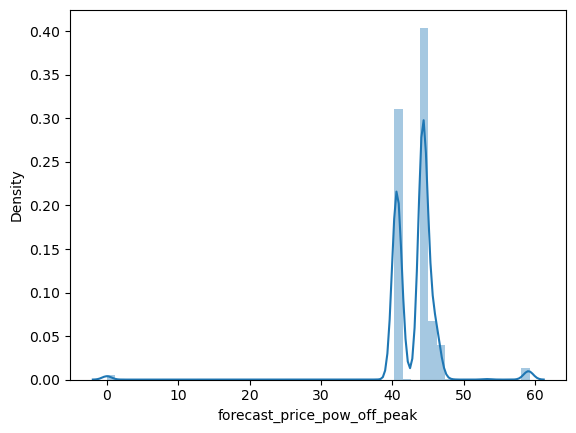

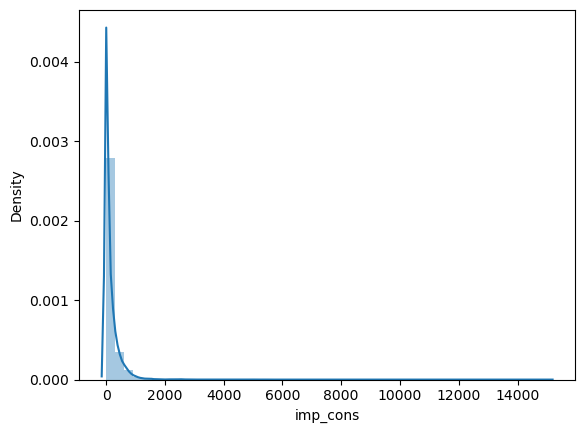

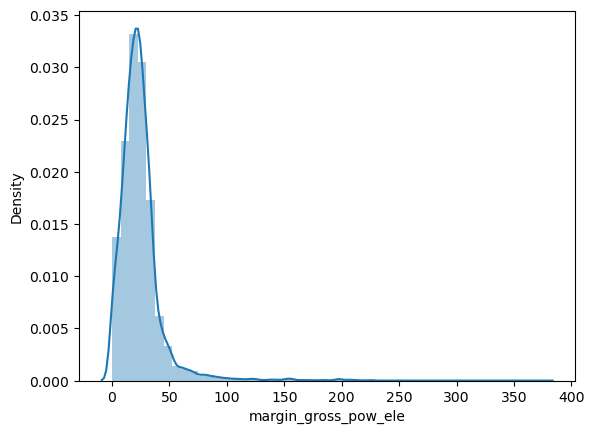

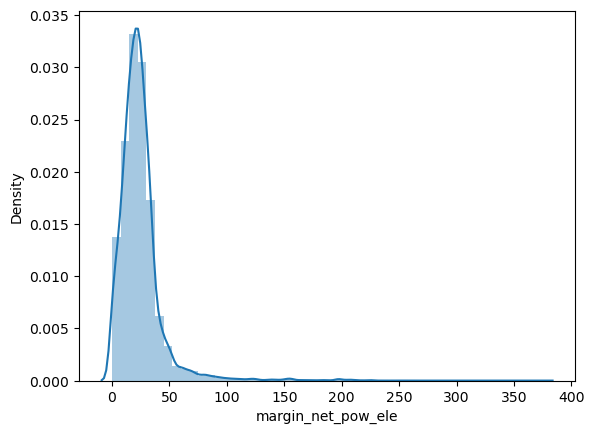

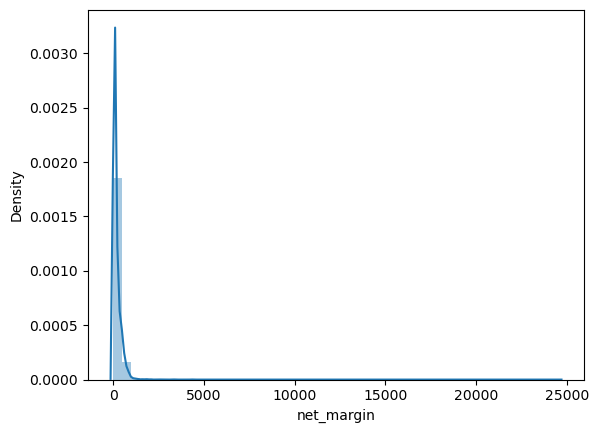

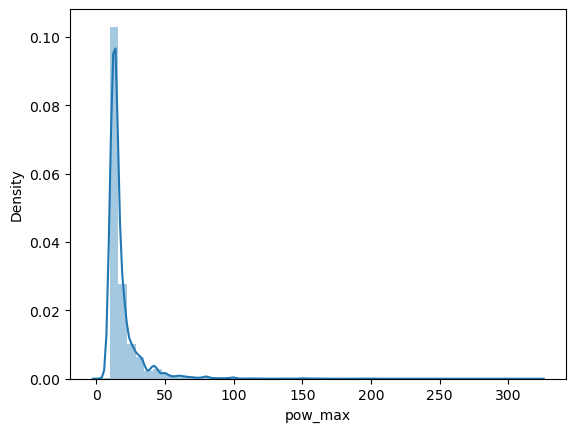

In [269]:
for col in numerical_cols:
    sns.distplot(numerical_cols[col])
    plt.show()

In [167]:
# Applying Log transformation with a constant 1 to the numerical columns to reduce the skewness and to make the distribution normal 

In [168]:
cols_to_log_transform = ['cons_12m', 'cons_gas_12m', 'cons_last_month', 'forecast_cons_12m',
       'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'imp_cons',
       'margin_gross_pow_ele', 'margin_net_pow_ele',
       'net_margin', 'pow_max'
       ]

In [169]:
df[cols_to_log_transform] = df[cols_to_log_transform].applymap(lambda x:np.log(x+1))

In [170]:
# Cheking the distribution after log transformation

In [270]:
numerical_cols = df[['cons_12m', 'cons_gas_12m', 'cons_last_month', 'forecast_cons_12m',
       'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'imp_cons',
       ]]

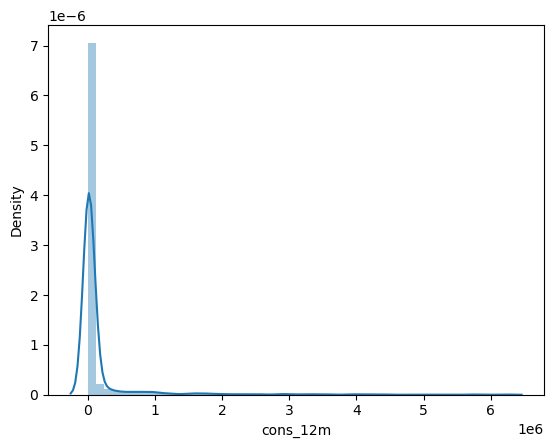

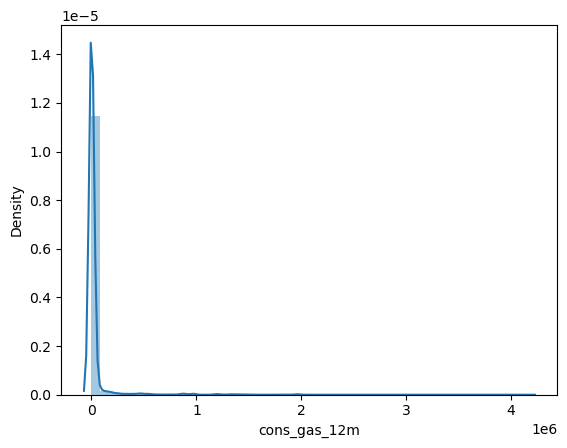

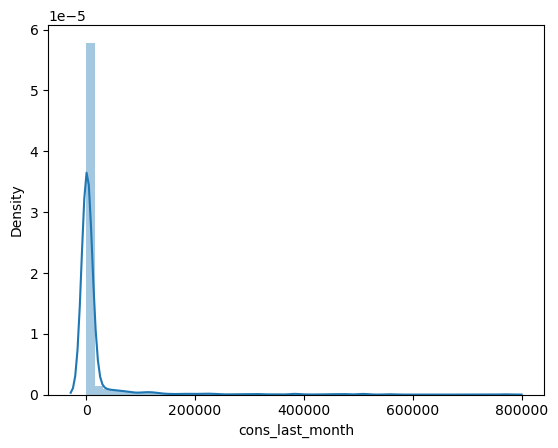

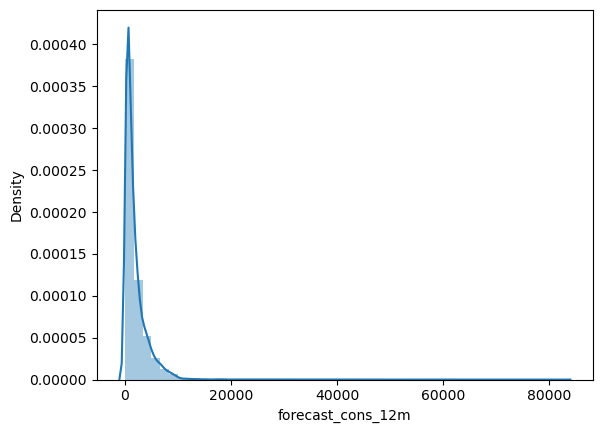

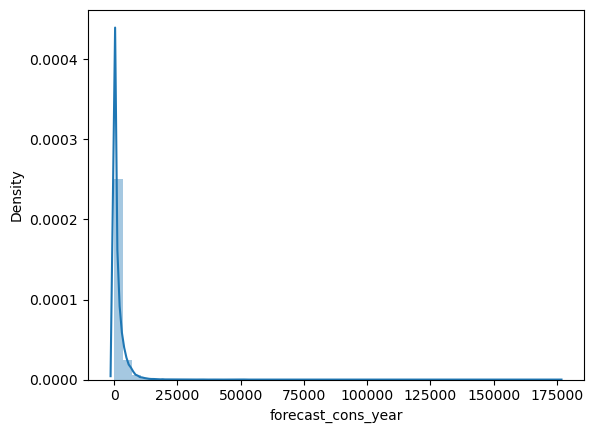

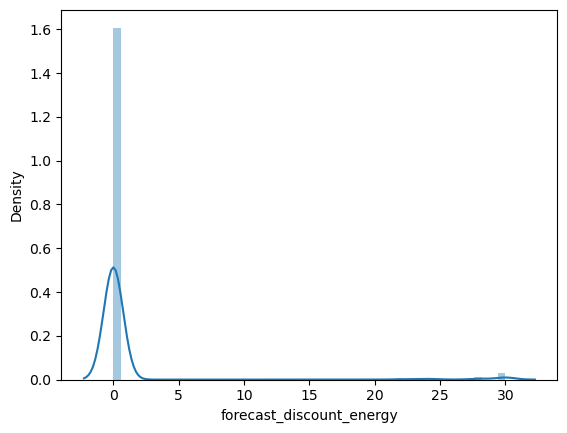

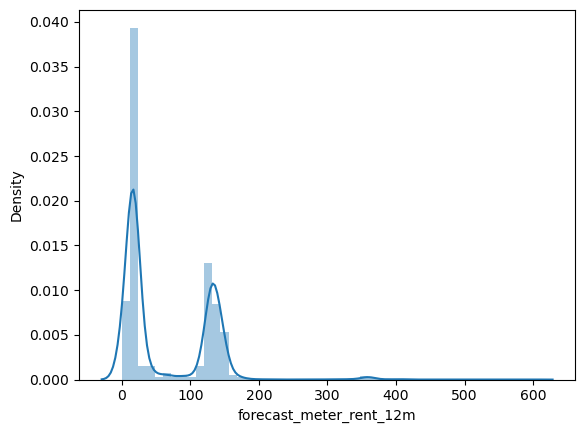

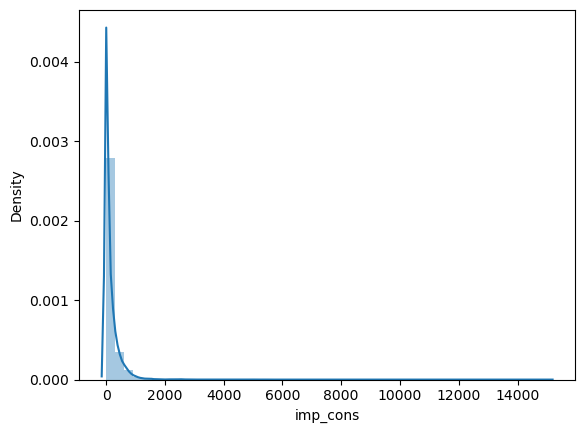

In [271]:
for col in numerical_cols:
    sns.distplot(numerical_cols[col])
    plt.show()

In [272]:
# Checking for the correlation one more time

In [273]:
corr_df =df[['cons_12m', 'cons_gas_12m', 'cons_last_month', 'forecast_cons_12m',
       'forecast_cons_year', 'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'imp_cons',
       'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'pow_max',  
       'offpeak_diff_dec_january_energy', 'offpeak_diff_dec_january_power',
       'peak_diff_dec_january_energy', 'peak_diff_dec_january_power',
       'mid_peak_diff_dec_january_energy', 'mid_peak_diff_dec_january_power','churn']]

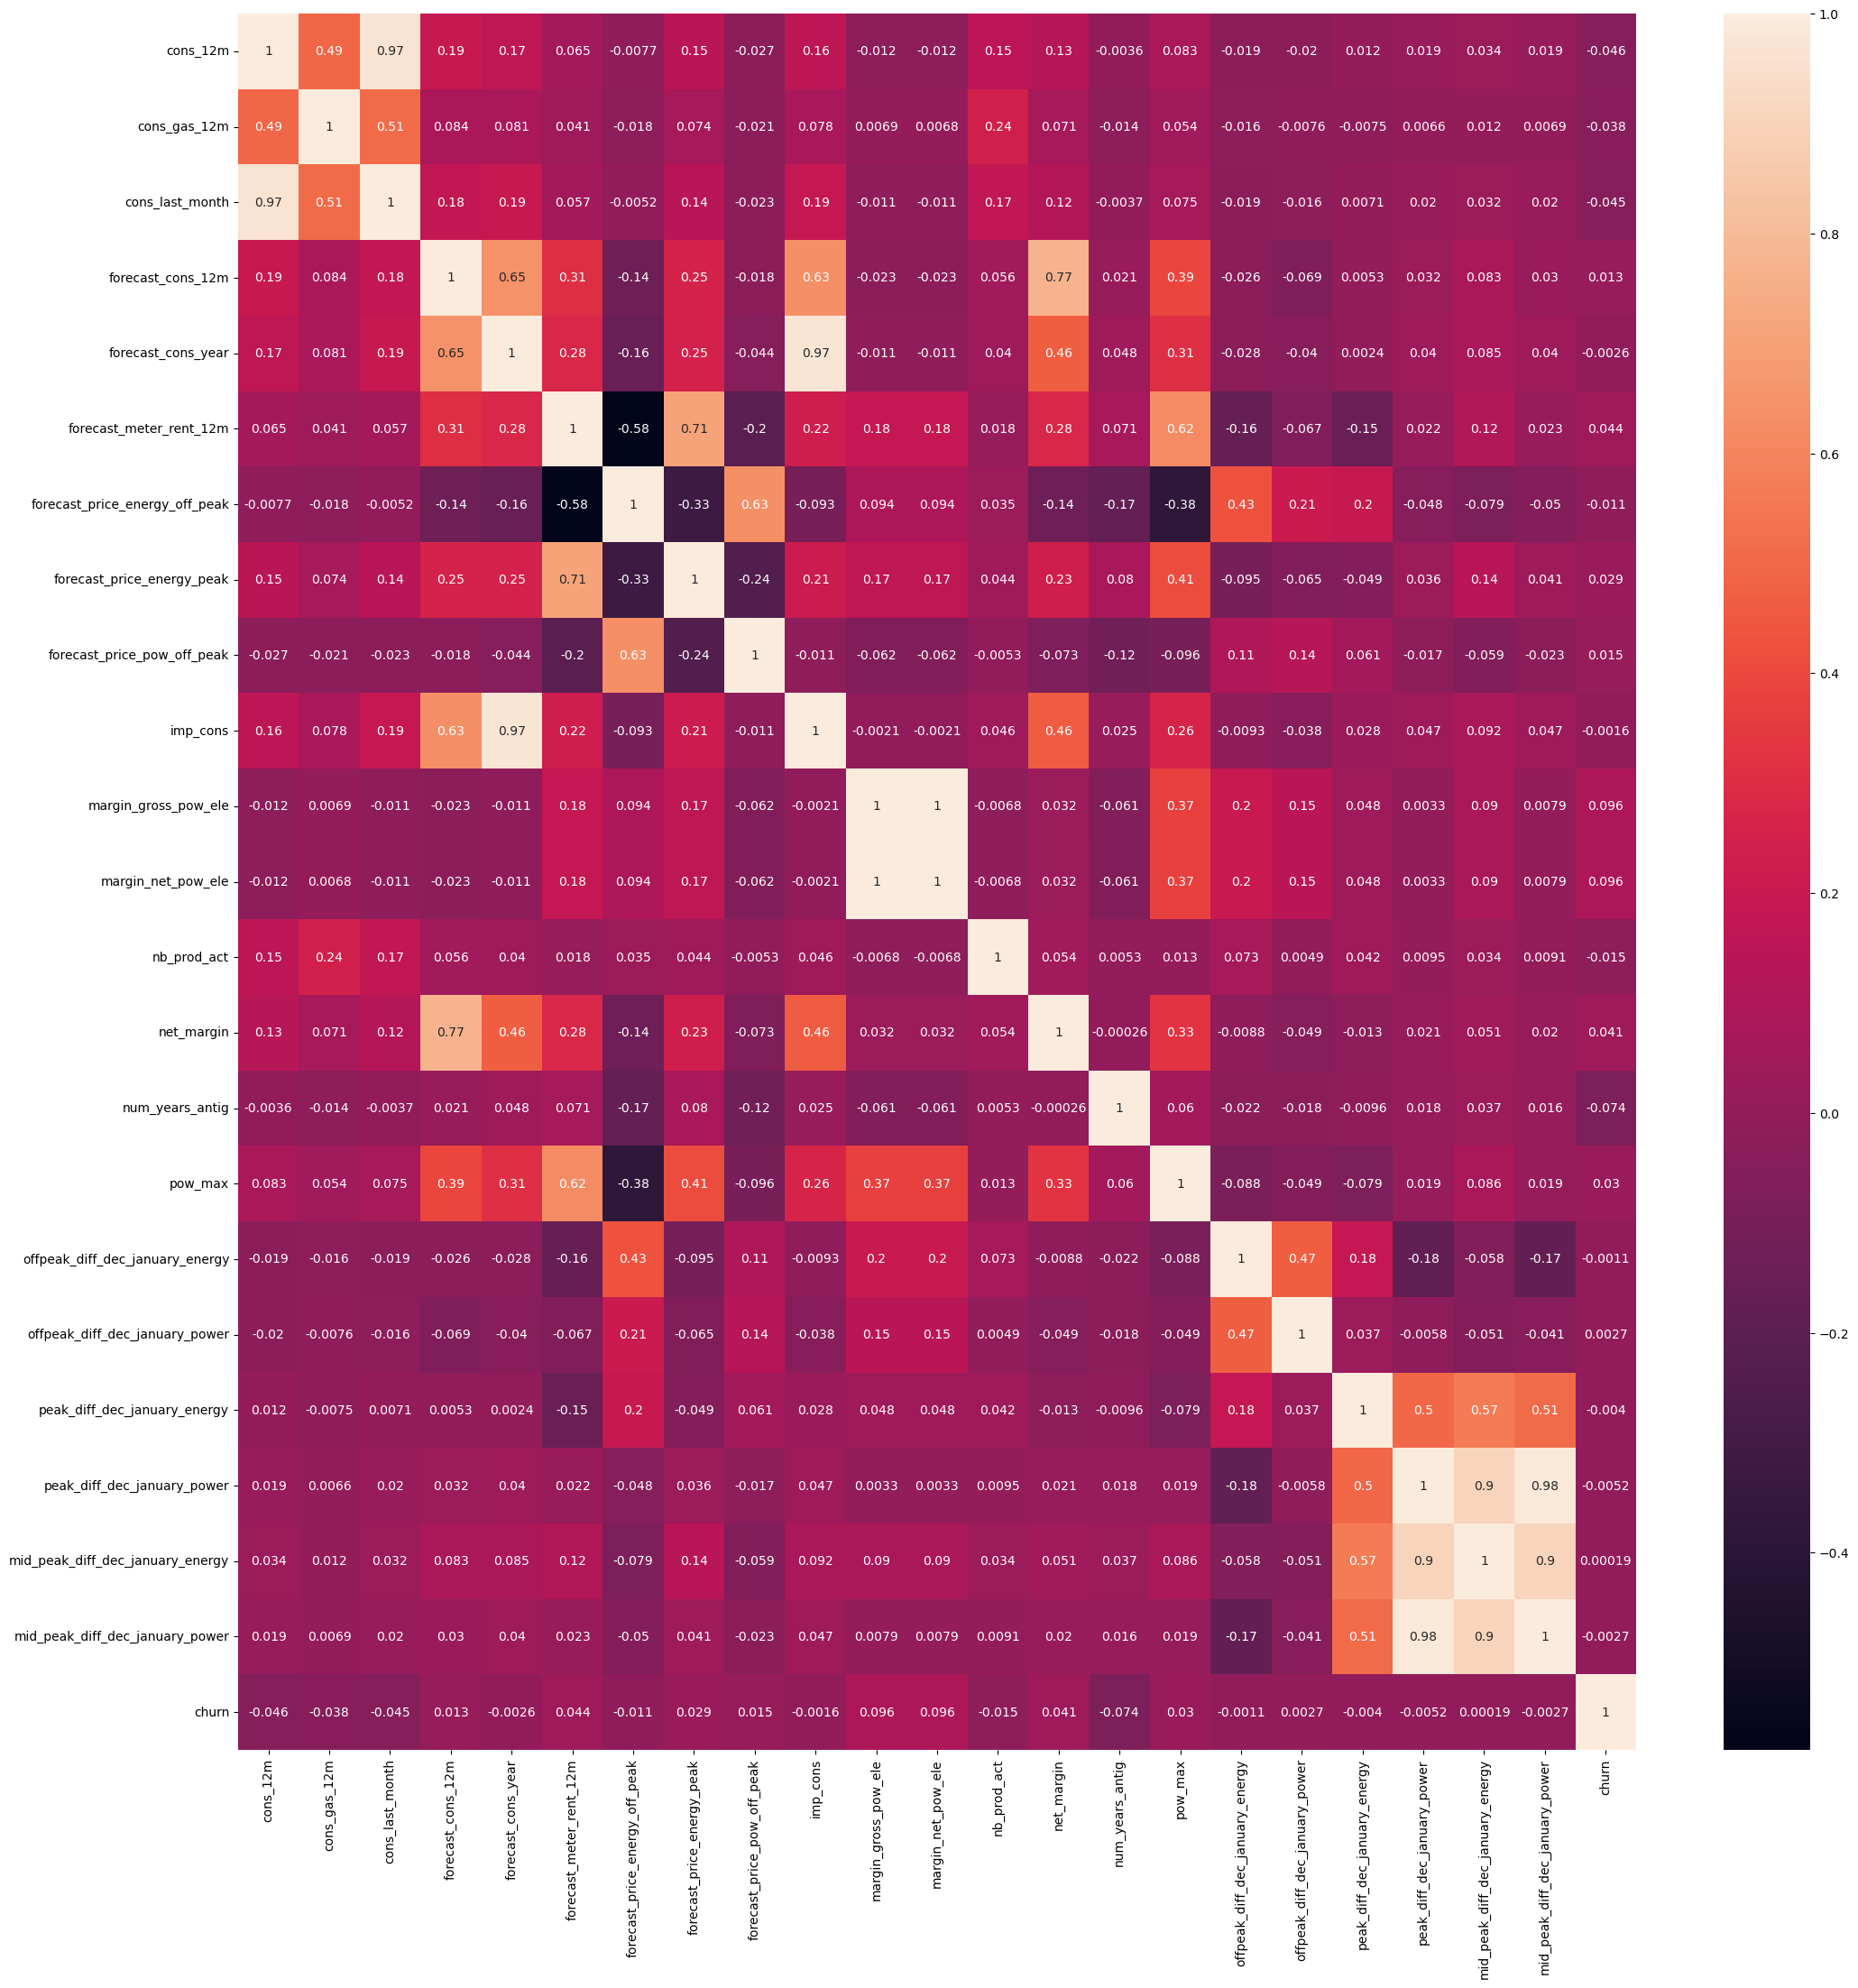

In [274]:
corr = corr_df.corr()
# Plot correlation
plt.figure(figsize=(25,25))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True, annot_kws={'size':10})
# Axis ticks size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [275]:
# We dont have any highly correlated features with the dependent variable

# Model Buiding

### Split the data

In [276]:
x = df.drop('churn', axis = 1)
y = df[['churn']]

In [277]:
x.head()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,channel_sales_foosdfpfkusacimwkcsosbicdxkicaua,channel_sales_lmkebamcaaclubfxadlmueccxoimlema,channel_sales_sddiedcslfslkckwlfkdpoeeailfpeds,channel_sales_usilxuppasemubllopkaafesmlibmsdf,has_gas,origin_up_ewxeelcelemmiwuafmddpobolfuxioce,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw,origin_up_usapbepcfoloekilkwsdiboslwaxobdp
0,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,...,1,0,0,0,1,0,0,0,1,0
1,4660,0,0,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,...,0,0,0,0,0,0,1,0,0,0
2,544,0,0,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,...,1,0,0,0,0,0,1,0,0,0
3,1584,0,0,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,...,0,1,0,0,0,0,1,0,0,0
4,4425,0,526,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,...,0,0,0,0,0,0,1,0,0,0


In [278]:
y.head()

,churn
0,1
1,0
2,0
3,0
4,0


In [279]:
y.value_counts()

churn
0        13186
1         1419
dtype: int64

### Scaling the data

In [280]:
from sklearn.preprocessing import StandardScaler

In [281]:
sc = StandardScaler()
x_scaled = sc.fit_transform(x)
x_scaled = pd.DataFrame(x_scaled,columns = x.columns)

In [282]:
x_scaled.head()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,channel_sales_foosdfpfkusacimwkcsosbicdxkicaua,channel_sales_lmkebamcaaclubfxadlmueccxoimlema,channel_sales_sddiedcslfslkckwlfkdpoeeailfpeds,channel_sales_usilxuppasemubllopkaafesmlibmsdf,has_gas,origin_up_ewxeelcelemmiwuafmddpobolfuxioce,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw,origin_up_usapbepcfoloekilkwsdiboslwaxobdp
0,-0.277664,0.164781,-0.250006,-0.782653,-0.431022,-0.189197,-0.926638,-0.926024,0.971817,-0.562504,...,1.078305,-0.380017,-0.027454,-0.322382,2.123987,-0.008275,-0.645328,-0.524182,1.028689,-0.011703
1,-0.269538,-0.172366,-0.250006,-0.703095,-0.431022,-0.189197,-0.707638,0.342354,-1.029626,0.263329,...,-0.927381,-0.380017,-0.027454,-0.322382,-0.470813,-0.008275,1.549599,-0.524182,-0.972111,-0.011703
2,-0.276715,-0.172366,-0.250006,-0.762566,-0.431022,-0.189197,-0.368332,1.158006,0.762928,0.263329,...,1.078305,-0.380017,-0.027454,-0.322382,-0.470813,-0.008275,1.549599,-0.524182,-0.972111,-0.011703
3,-0.274902,-0.172366,-0.250006,-0.682116,-0.431022,-0.189197,-0.653833,0.382277,-1.029626,0.263329,...,-0.927381,2.631460,-0.027454,-0.322382,-0.470813,-0.008275,1.549599,-0.524182,-0.972111,-0.011703
4,-0.269948,-0.172366,-0.241833,-0.595957,-0.269065,-0.189197,1.037410,-0.827778,1.010014,-0.562504,...,-0.927381,-0.380017,-0.027454,-0.322382,-0.470813,-0.008275,1.549599,-0.524182,-0.972111,-0.011703


### Splitting the data between train and test

In [283]:
from sklearn.model_selection import train_test_split

In [284]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.30, random_state=101)

In [285]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((10223, 45), (4382, 45), (10223, 1), (4382, 1))

### Balancing the Imbalanced Dataset

In [286]:
from imblearn.over_sampling import RandomOverSampler

In [287]:
ros = RandomOverSampler()

In [288]:
x_train_ros,y_train_ros = ros.fit_resample(x_train,y_train)

In [289]:
y_train_ros.value_counts()

churn
0        9228
1        9228
dtype: int64

### Model Building

In [290]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [291]:
# Logistic Regression

In [292]:
lr = LogisticRegression()
lr.fit(x_train_ros,y_train_ros)
y_train_pred_lr = lr.predict(x_train_ros)
y_test_pred_lr = lr.predict(x_test)
lr_train_accuracy = accuracy_score(y_train_ros,y_train_pred_lr)
lr_test_accuracy = accuracy_score(y_test,y_test_pred_lr)
lr_test_report = classification_report(y_test,y_test_pred_lr)
y_pred_proba_train_lr = lr.predict_proba(x_train_ros)
y_pred_proba_test_lr = lr.predict_proba(x_test)
auc_score_train_lr = roc_auc_score(y_train_ros,y_pred_proba_train_lr[:,1])
auc_score_test_lr = roc_auc_score(y_test,y_pred_proba_test_lr[:,1] )

In [293]:
print('Training accuracy : ',lr_train_accuracy)
print('Testing accuracy : ',lr_test_accuracy)

Training accuracy :  0.6273298656263546
Testing accuracy :  0.5912825193975354


In [294]:
print('Testing report : ','\n', lr_test_report)

Testing report :  
               precision    recall  f1-score   support

           0       0.93      0.59      0.72      3958
           1       0.14      0.61      0.22       424

    accuracy                           0.59      4382
   macro avg       0.54      0.60      0.47      4382
weighted avg       0.86      0.59      0.67      4382



In [295]:
tn, fp, fn, tp = (confusion_matrix(y_test,y_test_pred_lr).ravel())

print(confusion_matrix(y_test,y_test_pred_lr))
print('True Positive :',tp)
print('False Positive :',fp)
print('True Negative :' ,tn)
print('False Negative :',fn)

[[2333 1625]
 [ 166  258]]
True Positive : 258
False Positive : 1625
True Negative : 2333
False Negative : 166


In [296]:
print(auc_score_train_lr)
print(auc_score_test_lr)

0.6742422352843693
0.6334257343617417


ROC-AUC 0.6334257343617417


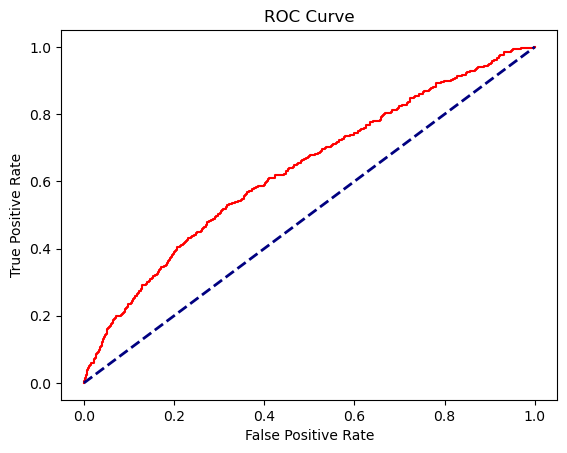

In [297]:
y_pred_proba = lr.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color = 'red')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')


print('ROC-AUC', roc_auc)

plt.show()

In [298]:
# Decision Tree

In [299]:
dt = DecisionTreeClassifier()
dt.fit(x_train_ros,y_train_ros)
y_train_pred_dt = dt.predict(x_train_ros)
y_test_pred_dt = dt.predict(x_test)
dt_train_accuracy = accuracy_score(y_train_ros,y_train_pred_dt)
dt_test_accuracy = accuracy_score(y_test,y_test_pred_dt)
dt_test_report = classification_report(y_test,y_test_pred_dt)
y_pred_proba_train_dt = dt.predict_proba(x_train_ros)
y_pred_proba_test_dt = dt.predict_proba(x_test)
auc_score_train_dt = roc_auc_score(y_train_ros,y_pred_proba_train_dt[:,1])
auc_score_test_dt = roc_auc_score(y_test,y_pred_proba_test_dt[:,1])

In [300]:
print('Training accuracy : ',dt_train_accuracy)
print('Testing accuracy : ',dt_test_accuracy)

Training accuracy :  1.0
Testing accuracy :  0.8359196713829302


In [301]:
print(dt_test_report)

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      3958
           1       0.15      0.15      0.15       424

    accuracy                           0.84      4382
   macro avg       0.53      0.53      0.53      4382
weighted avg       0.84      0.84      0.84      4382



In [302]:
tn, fp, fn, tp = (confusion_matrix(y_test,y_test_pred_dt).ravel())
print(confusion_matrix(y_test,y_test_pred_dt))
print('True Positive :',tp)
print('False Positive :',fp)
print('True Negative :' ,tn)
print('False Negative :',fn)

[[3600  358]
 [ 361   63]]
True Positive : 63
False Positive : 358
True Negative : 3600
False Negative : 361


In [303]:
print(auc_score_train_dt)
print(auc_score_test_dt)

1.0
0.529067591789259


ROC-AUC 0.529067591789259


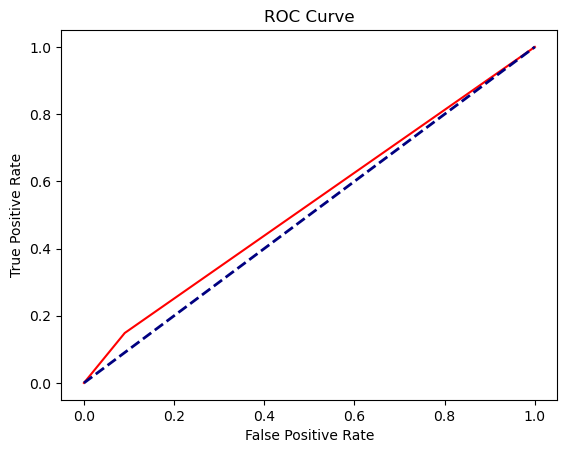

In [304]:
y_pred_proba = dt.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color = 'red')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')


print('ROC-AUC', roc_auc)

plt.show()

In [305]:
# Random Forest

In [306]:
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(x_train_ros,y_train_ros)
y_train_pred_rf = rf.predict(x_train_ros)
y_test_pred_rf = rf.predict(x_test)
rf_train_accuracy = accuracy_score(y_train_ros,y_train_pred_rf)
rf_test_accuracy = accuracy_score(y_test,y_test_pred_rf)
rf_test_report = classification_report(y_test,y_test_pred_rf)
y_pred_proba_train_rf = rf.predict_proba(x_train_ros)
y_pred_proba_test_rf = rf.predict_proba(x_test)
auc_score_train_rf = roc_auc_score(y_train_ros,y_pred_proba_train_rf[:,1])
auc_score_test_rf = roc_auc_score(y_test,y_pred_proba_test_rf[:,1])

In [307]:
print('Training accuracy : ',rf_train_accuracy)
print('Testing accuracy : ',rf_test_accuracy)

Training accuracy :  1.0
Testing accuracy :  0.9014148790506618


In [308]:
print(rf_test_report)

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      3958
           1       0.45      0.08      0.14       424

    accuracy                           0.90      4382
   macro avg       0.68      0.54      0.55      4382
weighted avg       0.87      0.90      0.87      4382



In [309]:
tn, fp, fn, tp = (confusion_matrix(y_test,y_test_pred_rf).ravel())

print(confusion_matrix(y_test,y_test_pred_rf))
print('True Positive :',tp)
print('False Positive :',fp)
print('True Negative :' ,tn)
print('False Negative :',fn)

[[3914   44]
 [ 388   36]]
True Positive : 36
False Positive : 44
True Negative : 3914
False Negative : 388


In [310]:
print(auc_score_train_rf)
print(auc_score_test_rf)

1.0
0.655270970186963


ROC-AUC 0.655270970186963


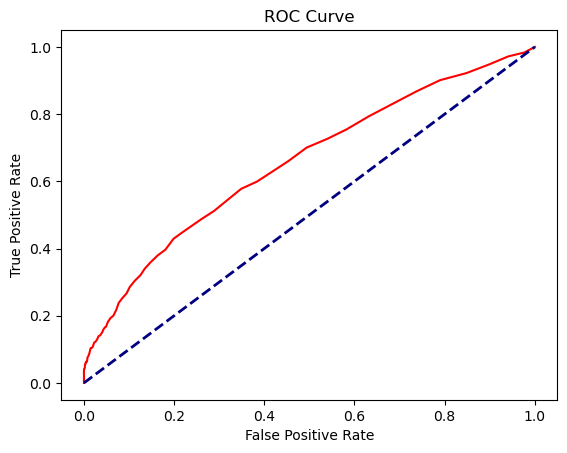

In [311]:
y_pred_proba = rf.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color = 'red')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')


print('ROC-AUC', roc_auc)

plt.show()

In [312]:
# XGB Classifier

In [313]:
xgb = XGBClassifier()
xgb.fit(x_train_ros,y_train_ros)
y_train_pred_xgb = xgb.predict(x_train_ros)
y_test_pred_xgb = xgb.predict(x_test)
xgb_train_accuracy = accuracy_score(y_train_ros,y_train_pred_xgb)
xgb_test_accuracy = accuracy_score(y_test,y_test_pred_xgb)
xgb_test_report = classification_report(y_test,y_test_pred_xgb)
y_pred_proba_train_xgb = xgb.predict_proba(x_train_ros)
y_pred_proba_test_xgb = xgb.predict_proba(x_test)
auc_score_train_xgb = roc_auc_score(y_train_ros,y_pred_proba_train_xgb[:,1])
auc_score_test_xgb = roc_auc_score(y_test,y_pred_proba_test_xgb[:,1])

In [314]:
print('Training accuracy : ',xgb_train_accuracy)
print('Testing accuracy : ',xgb_test_accuracy)

Training accuracy :  0.9884590377113134
Testing accuracy :  0.8566864445458695


In [315]:
print(xgb_test_report)

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      3958
           1       0.25      0.23      0.24       424

    accuracy                           0.86      4382
   macro avg       0.58      0.58      0.58      4382
weighted avg       0.85      0.86      0.85      4382



In [316]:
tn, fp, fn, tp = (confusion_matrix(y_test,y_test_pred_xgb).ravel())

print(confusion_matrix(y_test,y_test_pred_xgb))
print('True Positive :',tp)
print('False Positive :',fp)
print('True Negative :' ,tn)
print('False Negative :',fn)

[[3655  303]
 [ 325   99]]
True Positive : 99
False Positive : 303
True Negative : 3655
False Negative : 325


In [317]:
print(auc_score_train_xgb)
print(auc_score_test_xgb)

0.9994930244714217
0.6501621983658605


ROC-AUC 0.6501621983658605


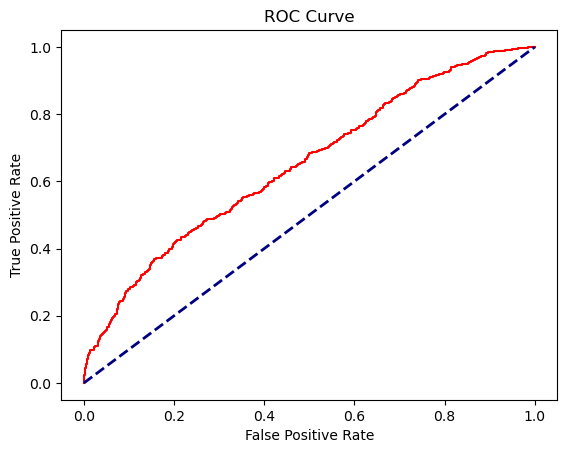

In [318]:
y_pred_proba = xgb.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color = 'red')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')


print('ROC-AUC', roc_auc)

plt.show()

In [319]:
# Bagging

In [320]:
bag = BaggingClassifier()
bag.fit(x_train_ros,y_train_ros)
y_train_pred_bag = bag.predict(x_train_ros)
y_test_pred_bag = bag.predict(x_test)
bag_train_accuracy = accuracy_score(y_train_ros,y_train_pred_bag)
bag_test_accuracy = accuracy_score(y_test,y_test_pred_bag)
bag_test_report = classification_report(y_test,y_test_pred_bag)
y_pred_proba_train_bag = bag.predict_proba(x_train_ros)
y_pred_proba_test_bag = bag.predict_proba(x_test)
auc_score_train_bag = roc_auc_score(y_train_ros,y_pred_proba_train_bag[:,1])
auc_score_test_bag = roc_auc_score(y_test,y_pred_proba_test_bag[:,1])

In [321]:
print('Training accuracy : ',bag_train_accuracy)
print('Testing accuracy : ',bag_test_accuracy)

Training accuracy :  0.9996749024707412
Testing accuracy :  0.888407120036513


In [322]:
print(bag_test_report)

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      3958
           1       0.33      0.15      0.20       424

    accuracy                           0.89      4382
   macro avg       0.62      0.56      0.57      4382
weighted avg       0.86      0.89      0.87      4382



In [323]:
tn, fp, fn, tp = (confusion_matrix(y_test,y_test_pred_bag).ravel())

print(confusion_matrix(y_test,y_test_pred_bag))
print('True Positive :',tp)
print('False Positive :',fp)
print('True Negative :' ,tn)
print('False Negative :',fn)

[[3831  127]
 [ 362   62]]
True Positive : 62
False Positive : 127
True Negative : 3831
False Negative : 362


In [324]:
print(auc_score_train_bag)
print(auc_score_test_bag)

0.9999997416505692
0.635906678139331


ROC-AUC 0.635906678139331


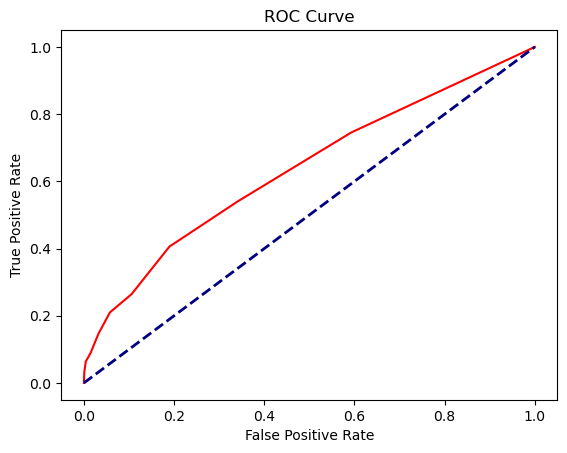

In [325]:
y_pred_proba = bag.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color = 'red')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')


print('ROC-AUC', roc_auc)

plt.show()

# Feature Importance

In [326]:
# Trying to understand the Model through feature importance of Random Forest

In [327]:
# Random Forest

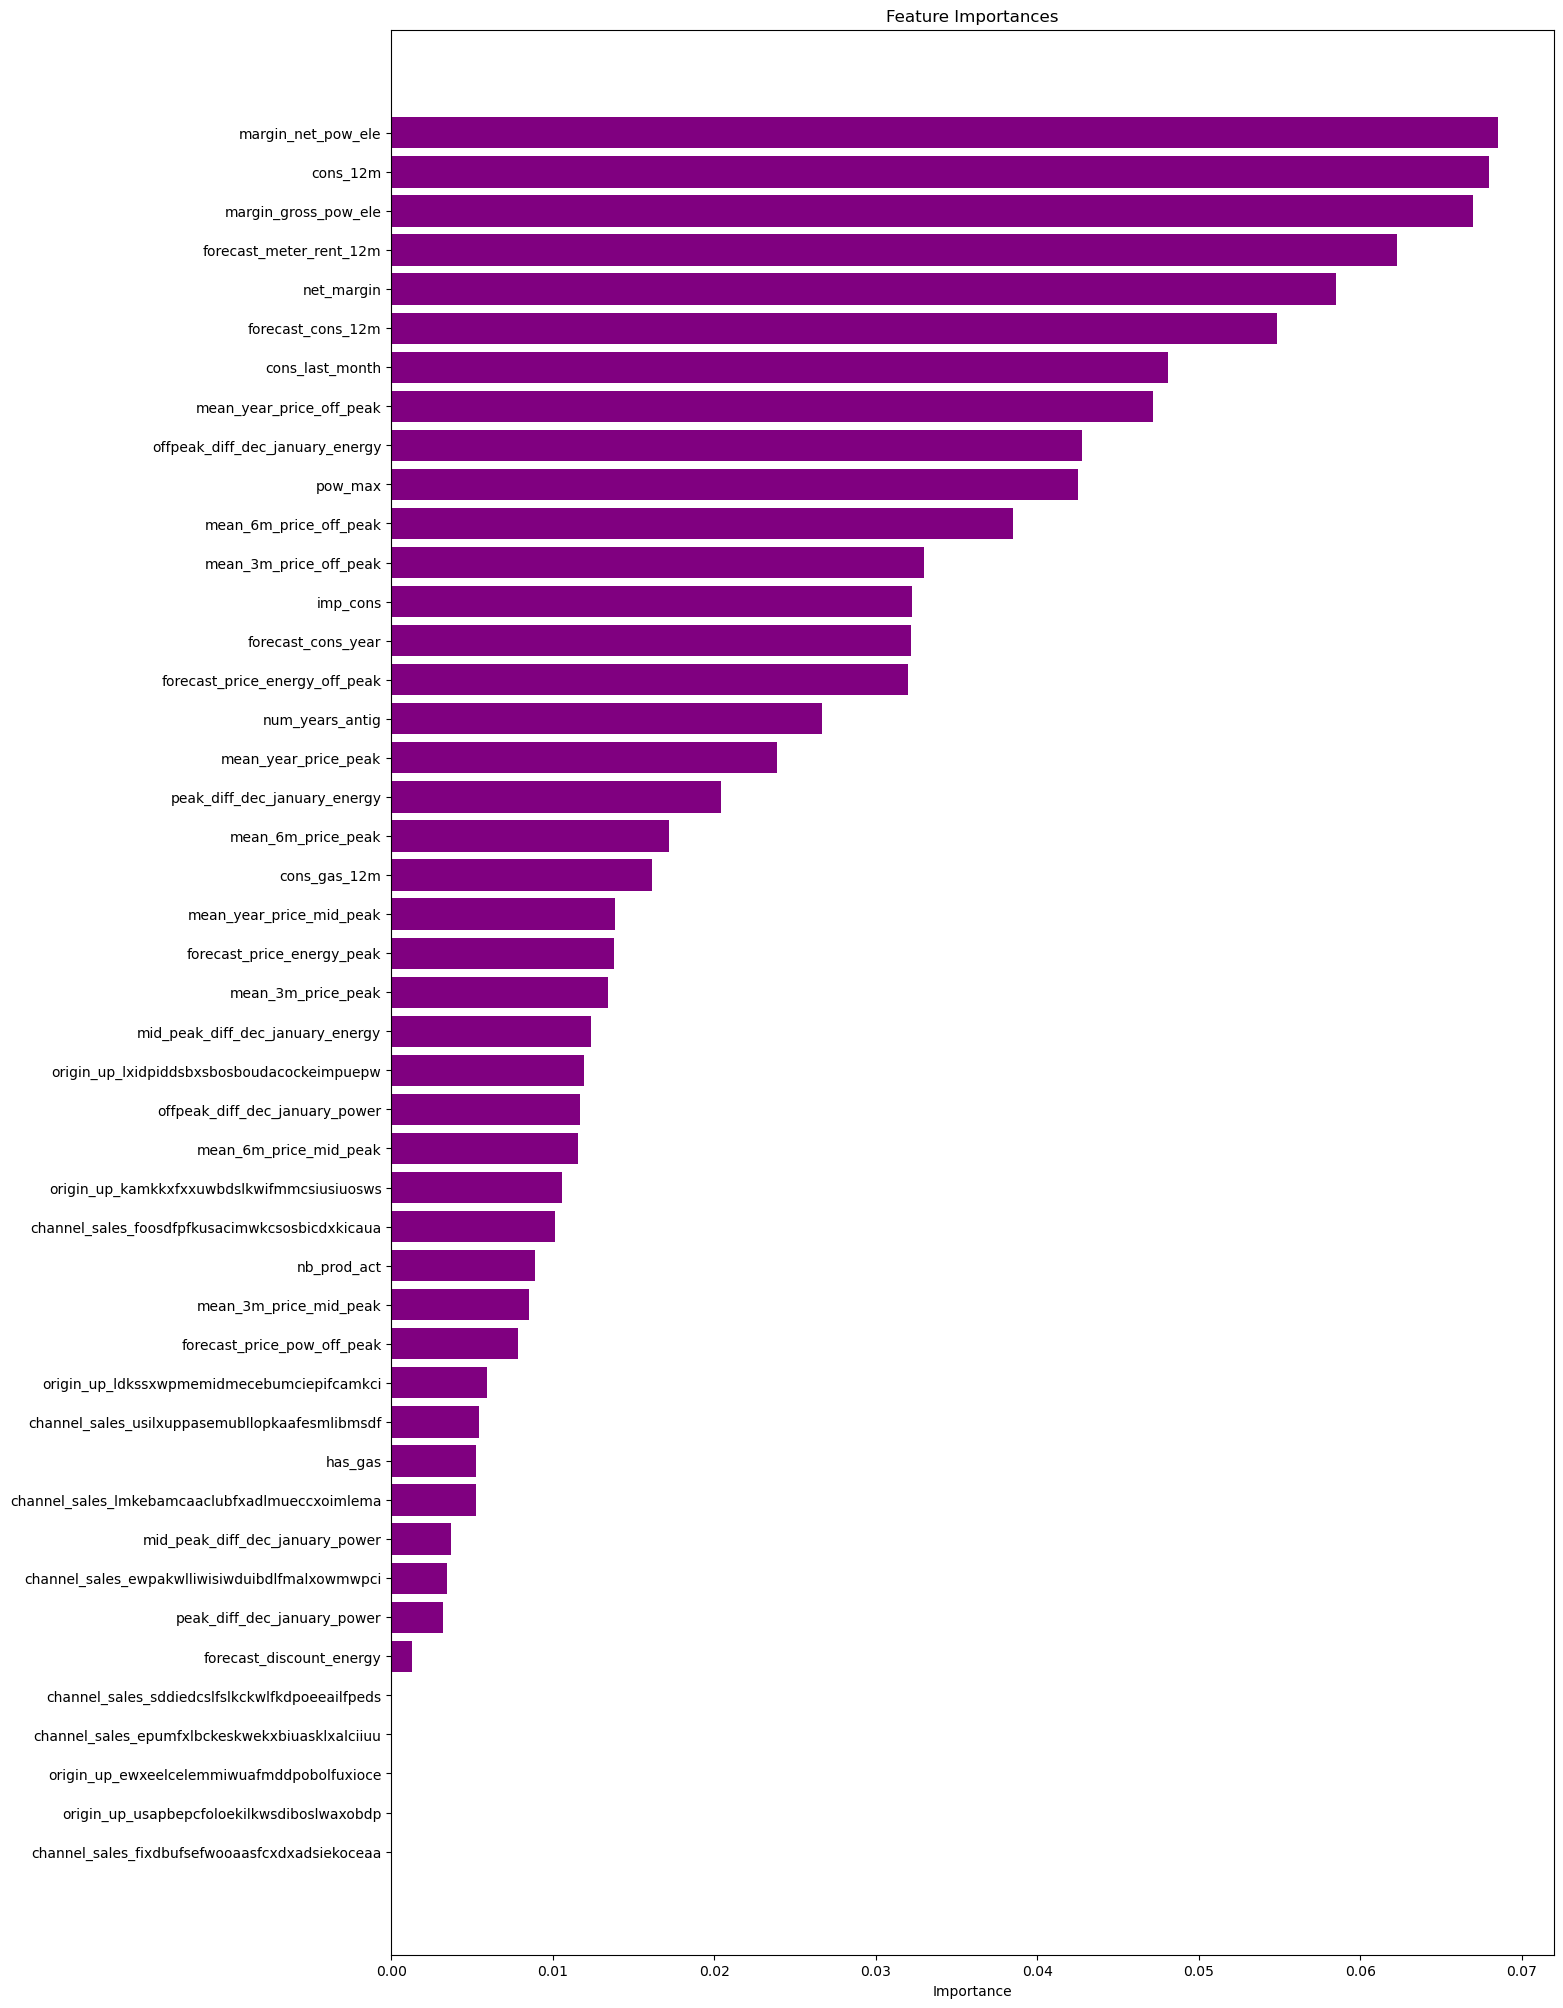

In [328]:
feature_importances_rf = rf.feature_importances_
feature_names = x_train_ros.columns
feature_importances = pd.DataFrame({
    'features': feature_names,
    'importance': feature_importances_rf
}).sort_values(by='importance', ascending=True).reset_index()

# Create a bar plot of feature importances
plt.figure(figsize=(15, 25))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'], color='purple', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')
plt.show()
